In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1_l2
from matplotlib.pyplot import figure

In [2]:
import os

In [6]:
dev = pd.read_csv("D:/Course content/Minor Project/TDT_Data/Validation.csv")

In [7]:
dev

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,0.409480,0.330053,0.588166,-0.058139,-0.359565,0.061654,0.783157,0.434004,0.049200,...,0.892950,-0.767745,0.439113,0.365136,0.573477,0.695570,-0.724616,0.458630,0.611607,0.826896
1,20,0.533911,0.643805,0.901475,0.143997,0.013035,-0.379633,0.730578,0.515096,0.347368,...,0.787014,-0.724356,0.284720,0.818754,0.730015,0.524863,-0.262078,0.392839,0.289762,0.825478
2,40,0.509951,0.666751,0.907186,0.363035,0.070572,-0.687706,0.727476,0.427720,0.543863,...,0.538350,0.519184,0.546229,0.941528,0.787032,-0.364118,0.216141,0.176713,0.060211,0.789942
3,60,0.240762,0.831359,0.661822,0.248816,0.096252,-0.365287,0.473186,0.073838,0.828981,...,-0.526119,0.647022,0.264069,0.884479,0.790552,-0.740754,0.134361,0.530370,0.342484,0.852868
4,80,0.187797,0.760324,0.483309,0.194137,0.020227,0.496607,0.460802,0.076955,0.879658,...,-0.733004,0.453606,0.239479,0.868984,0.641466,-0.804020,0.340424,0.616168,0.640221,0.776289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55870,1117400,0.252430,-0.371339,0.337835,-0.069046,-0.220030,0.174933,0.475429,0.192603,0.816235,...,0.649733,0.813218,-0.451405,0.396054,0.541864,0.693254,-0.839364,0.218996,-0.412561,0.511329
55871,1117420,0.651506,-0.681530,0.853833,0.002269,-0.028894,0.440940,0.597065,-0.161940,0.099349,...,0.248615,0.859941,-0.517496,0.586106,-0.085536,0.527270,-0.477805,0.318596,0.290935,0.737237
55872,1117440,0.357015,-0.478252,0.884538,0.095827,-0.070810,0.753470,0.732722,0.139935,-0.613398,...,-0.005278,-0.265326,0.337169,-0.170902,-0.483197,-0.478460,0.013249,-0.413465,0.340715,0.650361
55873,1117460,0.323493,-0.257720,0.808529,-0.053447,0.058645,0.378627,0.448387,0.528075,-0.796151,...,0.290560,-0.432021,0.435367,0.365950,0.096495,-0.820756,0.009772,-0.566893,0.428987,0.718649


In [8]:
dev.rename( columns={'Unnamed: 0':'0'}, inplace=True )
dev.drop('0', axis = 1)

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.409480,0.330053,0.588166,-0.058139,-0.359565,0.061654,0.783157,0.434004,0.049200,0.890888,...,0.892950,-0.767745,0.439113,0.365136,0.573477,0.695570,-0.724616,0.458630,0.611607,0.826896
1,0.533911,0.643805,0.901475,0.143997,0.013035,-0.379633,0.730578,0.515096,0.347368,0.935897,...,0.787014,-0.724356,0.284720,0.818754,0.730015,0.524863,-0.262078,0.392839,0.289762,0.825478
2,0.509951,0.666751,0.907186,0.363035,0.070572,-0.687706,0.727476,0.427720,0.543863,0.912617,...,0.538350,0.519184,0.546229,0.941528,0.787032,-0.364118,0.216141,0.176713,0.060211,0.789942
3,0.240762,0.831359,0.661822,0.248816,0.096252,-0.365287,0.473186,0.073838,0.828981,0.782181,...,-0.526119,0.647022,0.264069,0.884479,0.790552,-0.740754,0.134361,0.530370,0.342484,0.852868
4,0.187797,0.760324,0.483309,0.194137,0.020227,0.496607,0.460802,0.076955,0.879658,0.543056,...,-0.733004,0.453606,0.239479,0.868984,0.641466,-0.804020,0.340424,0.616168,0.640221,0.776289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55870,0.252430,-0.371339,0.337835,-0.069046,-0.220030,0.174933,0.475429,0.192603,0.816235,-0.536560,...,0.649733,0.813218,-0.451405,0.396054,0.541864,0.693254,-0.839364,0.218996,-0.412561,0.511329
55871,0.651506,-0.681530,0.853833,0.002269,-0.028894,0.440940,0.597065,-0.161940,0.099349,0.674637,...,0.248615,0.859941,-0.517496,0.586106,-0.085536,0.527270,-0.477805,0.318596,0.290935,0.737237
55872,0.357015,-0.478252,0.884538,0.095827,-0.070810,0.753470,0.732722,0.139935,-0.613398,0.642679,...,-0.005278,-0.265326,0.337169,-0.170902,-0.483197,-0.478460,0.013249,-0.413465,0.340715,0.650361
55873,0.323493,-0.257720,0.808529,-0.053447,0.058645,0.378627,0.448387,0.528075,-0.796151,0.662209,...,0.290560,-0.432021,0.435367,0.365950,0.096495,-0.820756,0.009772,-0.566893,0.428987,0.718649


In [9]:
dev_X = dev.drop(['0','21'], axis = 1)

In [10]:
dev_y = dev['21'].copy()
dev_y

0        0.826896
1        0.825478
2        0.789942
3        0.852868
4        0.776289
           ...   
55870    0.511329
55871    0.737237
55872    0.650361
55873    0.718649
55874    0.793269
Name: 21, Length: 55875, dtype: float64

In [11]:
dev_X.to_csv('D:/Course content/Minor Project/TDT_Data/X_Y_Split/Validation_X.csv')

In [12]:
dev_y.to_csv('D:/Course content/Minor Project/TDT_Data/X_Y_Split/Validation_y.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [13]:
train = pd.read_csv("D:/Course content/Minor Project/TDT_Data/Train.csv")
train

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,0,0.947559,0.409480,0.330053,0.588166,-0.058139,-0.359565,0.061654,0.783157,0.434004,...,-0.400429,0.892950,-0.767745,0.439113,0.365136,0.573477,0.695570,-0.724616,0.458630,0.611607
1,20,0.946109,0.533911,0.643805,0.901475,0.143997,0.013035,-0.379633,0.730578,0.515096,...,0.286061,0.787014,-0.724356,0.284720,0.818754,0.730015,0.524863,-0.262078,0.392839,0.289762
2,40,0.792396,0.509951,0.666751,0.907186,0.363035,0.070572,-0.687706,0.727476,0.427720,...,0.691376,0.538350,0.519184,0.546229,0.941528,0.787032,-0.364118,0.216141,0.176713,0.060211
3,60,0.229000,0.240762,0.831359,0.661822,0.248816,0.096252,-0.365287,0.473186,0.073838,...,0.869236,-0.526119,0.647022,0.264069,0.884479,0.790552,-0.740754,0.134361,0.530370,0.342484
4,80,0.055272,0.187797,0.760324,0.483309,0.194137,0.020227,0.496607,0.460802,0.076955,...,0.924381,-0.733004,0.453606,0.239479,0.868984,0.641466,-0.804020,0.340424,0.616168,0.640221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55870,1117400,0.936632,0.252430,-0.371339,0.337835,-0.069046,-0.220030,0.174933,0.475429,0.192603,...,-0.388412,0.649733,0.813218,-0.451405,0.396054,0.541864,0.693254,-0.839364,0.218996,-0.412561
55871,1117420,0.809799,0.651506,-0.681530,0.853833,0.002269,-0.028894,0.440940,0.597065,-0.161940,...,-0.093517,0.248615,0.859941,-0.517496,0.586106,-0.085536,0.527270,-0.477805,0.318596,0.290935
55872,1117440,0.561904,0.357015,-0.478252,0.884538,0.095827,-0.070810,0.753470,0.732722,0.139935,...,0.498036,-0.005278,-0.265326,0.337169,-0.170902,-0.483197,-0.478460,0.013249,-0.413465,0.340715
55873,1117460,0.067562,0.323493,-0.257720,0.808529,-0.053447,0.058645,0.378627,0.448387,0.528075,...,0.776052,0.290560,-0.432021,0.435367,0.365950,0.096495,-0.820756,0.009772,-0.566893,0.428987


In [14]:
train.rename( columns={'Unnamed: 0':'d'}, inplace=True )
train_X = train.drop(['d','20'], axis = 1)

In [15]:
train_X.to_csv('D:/Course content/Minor Project/TDT_Data/X_Y_Split/Train_X.csv')

In [16]:
dev_X = dev_X.loc[:, ~dev_X.columns.str.contains('^Unnamed')]
train_X = train_X.loc[:, ~dev_X.columns.str.contains('^Unnamed')]

In [17]:
train_y = train['20'].copy()
train_y.to_csv('D:/Course content/Minor Project/TDT_Data/X_Y_Split/Train_Y.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [18]:
pd.DataFrame(train_y).to_csv('D:/Course content/Minor Project/TDT_Data/X_Y_Split/Train_Y.csv')

In [19]:
STEP = 20
_dev_X = np.asarray(dev_X).reshape((int(1117500/STEP), 20 , 1))
_dev_X

array([[[ 0.40947965],
        [ 0.33005338],
        [ 0.58816566],
        ...,
        [-0.72461614],
        [ 0.45863021],
        [ 0.61160693]],

       [[ 0.53391135],
        [ 0.6438055 ],
        [ 0.90147457],
        ...,
        [-0.2620779 ],
        [ 0.39283896],
        [ 0.28976238]],

       [[ 0.50995144],
        [ 0.66675117],
        [ 0.9071856 ],
        ...,
        [ 0.21614121],
        [ 0.17671342],
        [ 0.06021101]],

       ...,

       [[ 0.35701547],
        [-0.47825165],
        [ 0.88453799],
        ...,
        [ 0.01324924],
        [-0.41346542],
        [ 0.34071496]],

       [[ 0.32349263],
        [-0.25772006],
        [ 0.8085293 ],
        ...,
        [ 0.00977206],
        [-0.56689338],
        [ 0.42898669]],

       [[-0.03896451],
        [ 0.17784005],
        [ 0.65304241],
        ...,
        [ 0.09234967],
        [-0.61989191],
        [ 0.49312196]]])

In [20]:
_dev_Y = np.asarray(dev_y).reshape(int(1117500/STEP), 1)
_dev_Y

array([[0.82689574],
       [0.82547789],
       [0.78994221],
       ...,
       [0.65036084],
       [0.71864937],
       [0.79326917]])

In [21]:
_train_X = np.asarray(train_X).reshape((int(1117500/STEP), 20, 1))
_train_Y = np.asarray(train_y).reshape(int(1117500/STEP), 1)
_train_X

array([[[ 0.9475591 ],
        [ 0.40947965],
        [ 0.33005338],
        ...,
        [ 0.69557023],
        [-0.72461614],
        [ 0.45863021]],

       [[ 0.94610878],
        [ 0.53391135],
        [ 0.6438055 ],
        ...,
        [ 0.52486325],
        [-0.2620779 ],
        [ 0.39283896]],

       [[ 0.79239585],
        [ 0.50995144],
        [ 0.66675117],
        ...,
        [-0.36411848],
        [ 0.21614121],
        [ 0.17671342]],

       ...,

       [[ 0.56190356],
        [ 0.35701547],
        [-0.47825165],
        ...,
        [-0.47846027],
        [ 0.01324924],
        [-0.41346542]],

       [[ 0.06756248],
        [ 0.32349263],
        [-0.25772006],
        ...,
        [-0.82075586],
        [ 0.00977206],
        [-0.56689338]],

       [[-0.09833009],
        [-0.03896451],
        [ 0.17784005],
        ...,
        [-0.85427934],
        [ 0.09234967],
        [-0.61989191]]])

In [22]:
test = pd.read_csv("D:/Course content/Minor Project/TDT_Data/Test1.csv")
test.rename( columns={'Unnamed: 0':'d'}, inplace=True )
test_X = test.drop(['d','22'], axis = 1)

In [23]:
test_y = test['22'].copy()
test_X.to_csv('D:/Course content/Minor Project/TDT_Data/X_Y_Split/Test_X.csv')

In [24]:
test_y.to_csv('D:/Course content/Minor Project/TDT_Data/X_Y_Split/Test_Y.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [25]:
_test_X = np.asarray(test_X).reshape((int(1117500/STEP), 20, 1))
_test_Y = np.asarray(test_y).reshape(int(1117500/STEP), 1)

In [28]:
train_loss = []
dev_loss = []
test1_loss = []

train_mse = []
dev_mse = []
test1_mse = []

train_mae = []
dev_mae = []
test1_mae = []

#Uncomment following lines if you want to start new epochs. If you want to continue on previous epochs, keep commented.

dict = {'TRAIN_LOSS' : [], 'DEV_LOSS' : [], 'TEST1_LOSS' : [], 'TEST2_LOSS' : [], 'TRAIN_MSE' : [], 'DEV_MSE' : [], 'TEST1_MSE' : [], 'TEST2_MSE' : [], 'TRAIN_MAE' : [], 'DEV_MAE' : [], 'TEST1_MAE' : [], 'TEST2_MAE' : []}
df = pd.DataFrame(dict)
df.to_csv("D:/Course content/Minor Project/models/hybrid_LSTM.csv")


class Double_Tanh(Activation):
    def _init_(self, activation, **kwargs):
        super(Double_Tanh, self)._init_(activation, **kwargs)
        self._name_ = 'double_tanh'

def double_tanh(x):
    return (K.tanh(x) * 2)

get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})

# Generate Model

#initialize a LSTM model
model = Sequential()
# describe input shape time steps, kernel and bias regularizer
model.add(LSTM(25, input_shape=(20,1), dropout=0.0, kernel_regularizer=l1_l2(0.00,0.00), bias_regularizer=l1_l2(0.00,0.00)))
model.add(Dense(1))
#describe the activation function. Note that this is the activation function of output gate and not the forget gate
model.add(Activation(double_tanh))
#compile model on mean square error and mean absolute error metric
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

print(model.metrics_names)
# Fitting the Model
model_scores = {}
score_list = []

epoch_num=1
for _ in range(350):

    # train the model
        m = model.fit(_train_X, _train_Y, epochs=1, batch_size=500, shuffle=True)
        print('history :', m.history)
        score_list.append(m.history)

    # Test model on train/dev/test1/test2
        score_train = model.evaluate(_train_X, _train_Y)
        score_dev = model.evaluate(_dev_X, _dev_Y)
        score_test1 = model.evaluate(_test_X, _test_Y)
    
    # Prediction Values for train/dev/test1/test2
    
        predTrain = model.predict(np.asarray(_train_X))
        predDev = model.predict(np.asarray(_dev_X))
        predTest1 = model.predict(np.asarray(_test_X))

    
    #print score data
        print(score_train)
        print('train set score : loss - ' + str(score_train[0]) + 'train set score : mse - ' + str(score_train[1]) +' / mae - ' + str(score_train[2]))
        print('dev set score : loss - ' + str(score_train[0]) + 'dev set score : mse - ' + str(score_dev[1]) +' / mae - ' + str(score_dev[2]))
        print('test1 set score : loss - ' + str(score_train[0]) + 'test1 set score : mse - ' + str(score_test1[1]) +' / mae - ' + str(score_test1[2]))

    # get former score data
        df = pd.read_csv("D:/Course content/Minor Project/models/hybrid_LSTM.csv")
       
        train_mse = list(df['TRAIN_MSE'])
        dev_mse = list(df['DEV_MSE'])
        test1_mse = list(df['TEST1_MSE'])

        train_mae = list(df['TRAIN_MAE'])
        dev_mae = list(df['DEV_MAE'])
        test1_mae = list(df['TEST1_MAE'])

    
        print(score_train)
    
    
        # add new score data with the old data and update it back in the csv
        train_loss.append(score_train[0])
        dev_loss.append(score_dev[0])
        test1_loss.append(score_test1[0])
    
        train_mse.append(score_train[1])
        dev_mse.append(score_dev[1])
        test1_mse.append(score_test1[1])

        train_mae.append(score_train[2])
        dev_mae.append(score_dev[2])
        test1_mae.append(score_test1[2])
    
        model_scores['TRAIN_MSE'] = train_mse
        model_scores['DEV_MSE'] = dev_mse
        model_scores['TEST1_MSE'] = test1_mse

        model_scores['TRAIN_MAE'] = train_mae
        model_scores['DEV_MAE'] = dev_mae
        model_scores['TEST1_MAE'] = test1_mae

        model_scores_df = pd.DataFrame(model_scores)
        model_scores_df.to_csv("D:/Course content/Minor Project/models/hybrid_LSTM.csv")

[]
112/112 [==============================] - 1s 12ms/step - loss: 0.2232 - mse: 0.2232 - mae: 0.4025
history : {'loss': [0.223164364695549], 'mse': [0.223164364695549], 'mae': [0.4025028347969055]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2433 - mse: 0.2433 - mae: 0.4338
[0.22271037101745605, 0.22271037101745605, 0.40041905641555786]
train set score : loss - 0.22271037101745605train set score : mse - 0.22271037101745605 / mae - 0.40041905641555786
dev set score : loss - 0.22271037101745605dev set score : mse - 0.2469272017478943 / mae - 0.4321382939815521
test1 set score : loss - 0.22271037101745605test1 set score : mse - 0.24331481754779816 / mae - 0.4337981343269348
[0.22271037101745605, 0.22271037101745605, 0.40041905641555786]
112/112 [==============================] - 1s 11ms/step - loss: 0.2221 - mse: 0.2221 - mae: 0.4016
history : {'loss': [0.2220759391784668], 'mse': [0.2220759391784668], 'mae': [0.4015962779521942]}
1747/1747 [=======================

112/112 [==============================] - 1s 11ms/step - loss: 0.2207 - mse: 0.2207 - mae: 0.4000
history : {'loss': [0.22069334983825684], 'mse': [0.22069334983825684], 'mae': [0.40003344416618347]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2611 - mse: 0.2611 - mae: 0.4509
[0.22073157131671906, 0.22073157131671906, 0.401109516620636]
train set score : loss - 0.22073157131671906train set score : mse - 0.22073157131671906 / mae - 0.401109516620636
dev set score : loss - 0.22073157131671906dev set score : mse - 0.2560696601867676 / mae - 0.4419369697570801
test1 set score : loss - 0.22073157131671906test1 set score : mse - 0.26107895374298096 / mae - 0.45086029171943665
[0.22073157131671906, 0.22073157131671906, 0.401109516620636]
112/112 [==============================] - 1s 11ms/step - loss: 0.2207 - mse: 0.2207 - mae: 0.4001
history : {'loss': [0.22067834436893463], 'mse': [0.22067834436893463], 'mae': [0.4001432955265045]}
1747/1747 [========================

112/112 [==============================] - 1s 11ms/step - loss: 0.2202 - mse: 0.2202 - mae: 0.3995
history : {'loss': [0.22018545866012573], 'mse': [0.22018545866012573], 'mae': [0.3994519114494324]}
1747/1747 [==============================] - 3s 1ms/step - loss: 0.2561 - mse: 0.2561 - mae: 0.4457
[0.2199329435825348, 0.2199329435825348, 0.39928942918777466]
train set score : loss - 0.2199329435825348train set score : mse - 0.2199329435825348 / mae - 0.39928942918777466
dev set score : loss - 0.2199329435825348dev set score : mse - 0.2538204789161682 / mae - 0.4391610324382782
test1 set score : loss - 0.2199329435825348test1 set score : mse - 0.2561473846435547 / mae - 0.4457116425037384
[0.2199329435825348, 0.2199329435825348, 0.39928942918777466]
112/112 [==============================] - 1s 11ms/step - loss: 0.2202 - mse: 0.2202 - mae: 0.3995
history : {'loss': [0.22023925185203552], 'mse': [0.22023925185203552], 'mae': [0.39952898025512695]}
1747/1747 [============================

112/112 [==============================] - 1s 11ms/step - loss: 0.2198 - mse: 0.2198 - mae: 0.3990
history : {'loss': [0.219750314950943], 'mse': [0.219750314950943], 'mae': [0.39900457859039307]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2556 - mse: 0.2556 - mae: 0.4451
[0.21951091289520264, 0.21951091289520264, 0.3987681269645691]
train set score : loss - 0.21951091289520264train set score : mse - 0.21951091289520264 / mae - 0.3987681269645691
dev set score : loss - 0.21951091289520264dev set score : mse - 0.25419461727142334 / mae - 0.43931207060813904
test1 set score : loss - 0.21951091289520264test1 set score : mse - 0.25564128160476685 / mae - 0.4450737237930298
[0.21951091289520264, 0.21951091289520264, 0.3987681269645691]
112/112 [==============================] - 1s 11ms/step - loss: 0.2197 - mse: 0.2197 - mae: 0.3991
history : {'loss': [0.21971528232097626], 'mse': [0.21971528232097626], 'mae': [0.39907950162887573]}
1747/1747 [=======================

112/112 [==============================] - 1s 11ms/step - loss: 0.2194 - mse: 0.2194 - mae: 0.3987
history : {'loss': [0.21941101551055908], 'mse': [0.21941101551055908], 'mae': [0.39872267842292786]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2571 - mse: 0.2571 - mae: 0.4463
[0.21925126016139984, 0.21925126016139984, 0.39869290590286255]
train set score : loss - 0.21925126016139984train set score : mse - 0.21925126016139984 / mae - 0.39869290590286255
dev set score : loss - 0.21925126016139984dev set score : mse - 0.2552967965602875 / mae - 0.440303236246109
test1 set score : loss - 0.21925126016139984test1 set score : mse - 0.2570503056049347 / mae - 0.4462747573852539
[0.21925126016139984, 0.21925126016139984, 0.39869290590286255]
112/112 [==============================] - 1s 11ms/step - loss: 0.2195 - mse: 0.2195 - mae: 0.3988
history : {'loss': [0.21947769820690155], 'mse': [0.21947769820690155], 'mae': [0.3988482654094696]}
1747/1747 [=====================

112/112 [==============================] - 1s 11ms/step - loss: 0.2189 - mse: 0.2189 - mae: 0.3981
history : {'loss': [0.218931183218956], 'mse': [0.218931183218956], 'mae': [0.39811691641807556]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2659 - mse: 0.2659 - mae: 0.4545
[0.21910417079925537, 0.21910417079925537, 0.39961954951286316]
train set score : loss - 0.21910417079925537train set score : mse - 0.21910417079925537 / mae - 0.39961954951286316
dev set score : loss - 0.21910417079925537dev set score : mse - 0.2608746290206909 / mae - 0.44573551416397095
test1 set score : loss - 0.21910417079925537test1 set score : mse - 0.2659071683883667 / mae - 0.45453372597694397
[0.21910417079925537, 0.21910417079925537, 0.39961954951286316]
112/112 [==============================] - 1s 11ms/step - loss: 0.2188 - mse: 0.2188 - mae: 0.3982
history : {'loss': [0.2188369333744049], 'mse': [0.2188369333744049], 'mae': [0.3981530964374542]}
1747/1747 [========================

112/112 [==============================] - 1s 11ms/step - loss: 0.2181 - mse: 0.2181 - mae: 0.3971
history : {'loss': [0.21808022260665894], 'mse': [0.21808022260665894], 'mae': [0.3971359431743622]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2560 - mse: 0.2560 - mae: 0.4451
[0.21797305345535278, 0.21797305345535278, 0.39741554856300354]
train set score : loss - 0.21797305345535278train set score : mse - 0.21797305345535278 / mae - 0.39741554856300354
dev set score : loss - 0.21797305345535278dev set score : mse - 0.25713294744491577 / mae - 0.4413813352584839
test1 set score : loss - 0.21797305345535278test1 set score : mse - 0.2560124397277832 / mae - 0.4450613260269165
[0.21797305345535278, 0.21797305345535278, 0.39741554856300354]
112/112 [==============================] - 1s 12ms/step - loss: 0.2180 - mse: 0.2180 - mae: 0.3971
history : {'loss': [0.21798430383205414], 'mse': [0.21798430383205414], 'mae': [0.3970666229724884]}
1747/1747 [====================

112/112 [==============================] - 1s 10ms/step - loss: 0.2176 - mse: 0.2176 - mae: 0.3966
history : {'loss': [0.2175716906785965], 'mse': [0.2175716906785965], 'mae': [0.3965927064418793]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2521 - mse: 0.2521 - mae: 0.4405
[0.21737778186798096, 0.21737778186798096, 0.39564409852027893]
train set score : loss - 0.21737778186798096train set score : mse - 0.21737778186798096 / mae - 0.39564409852027893
dev set score : loss - 0.21737778186798096dev set score : mse - 0.25404462218284607 / mae - 0.43781226873397827
test1 set score : loss - 0.21737778186798096test1 set score : mse - 0.2521151900291443 / mae - 0.44049006700515747
[0.21737778186798096, 0.21737778186798096, 0.39564409852027893]
112/112 [==============================] - 1s 10ms/step - loss: 0.2174 - mse: 0.2174 - mae: 0.3963
history : {'loss': [0.21738100051879883], 'mse': [0.21738100051879883], 'mae': [0.3963419795036316]}
1747/1747 [====================

112/112 [==============================] - 2s 14ms/step - loss: 0.2168 - mse: 0.2168 - mae: 0.3958: 0s - loss: 0.2170 - mse: 0.2170
history : {'loss': [0.21680454909801483], 'mse': [0.21680454909801483], 'mae': [0.39577752351760864]}
1747/1747 [==============================] - 3s 2ms/step - loss: 0.2555 - mse: 0.2555 - mae: 0.4433
[0.21637170016765594, 0.21637170016765594, 0.3949047029018402]
train set score : loss - 0.21637170016765594train set score : mse - 0.21637170016765594 / mae - 0.3949047029018402
dev set score : loss - 0.21637170016765594dev set score : mse - 0.2567867636680603 / mae - 0.4399307668209076
test1 set score : loss - 0.21637170016765594test1 set score : mse - 0.2555287480354309 / mae - 0.44333064556121826
[0.21637170016765594, 0.21637170016765594, 0.3949047029018402]
112/112 [==============================] - 2s 15ms/step - loss: 0.2167 - mse: 0.2167 - mae: 0.3956: 0s - loss: 0.2170 - mse: 0.2170 - mae: 0.3
history : {'loss': [0.21669895946979523], 'mse': [0.21669

112/112 [==============================] - 1s 12ms/step - loss: 0.2161 - mse: 0.2161 - mae: 0.3949
history : {'loss': [0.21608208119869232], 'mse': [0.21608208119869232], 'mae': [0.39487147331237793]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2526 - mse: 0.2526 - mae: 0.4410
[0.21558576822280884, 0.21558576822280884, 0.39420297741889954]
train set score : loss - 0.21558576822280884train set score : mse - 0.21558576822280884 / mae - 0.39420297741889954
dev set score : loss - 0.21558576822280884dev set score : mse - 0.25767719745635986 / mae - 0.4407255947589874
test1 set score : loss - 0.21558576822280884test1 set score : mse - 0.252596378326416 / mae - 0.440997838973999
[0.21558576822280884, 0.21558576822280884, 0.39420297741889954]
112/112 [==============================] - 1s 11ms/step - loss: 0.2160 - mse: 0.2160 - mae: 0.3948
history : {'loss': [0.21597176790237427], 'mse': [0.21597176790237427], 'mae': [0.3947676420211792]}
1747/1747 [=====================

112/112 [==============================] - 1s 12ms/step - loss: 0.2151 - mse: 0.2151 - mae: 0.3938
history : {'loss': [0.2151394486427307], 'mse': [0.2151394486427307], 'mae': [0.3937671482563019]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2697 - mse: 0.2697 - mae: 0.4563
[0.2155054211616516, 0.2155054211616516, 0.3952327370643616]
train set score : loss - 0.2155054211616516train set score : mse - 0.2155054211616516 / mae - 0.3952327370643616
dev set score : loss - 0.2155054211616516dev set score : mse - 0.26386189460754395 / mae - 0.447013258934021
test1 set score : loss - 0.2155054211616516test1 set score : mse - 0.26969802379608154 / mae - 0.45632264018058777
[0.2155054211616516, 0.2155054211616516, 0.3952327370643616]
112/112 [==============================] - 1s 11ms/step - loss: 0.2151 - mse: 0.2151 - mae: 0.3938
history : {'loss': [0.21513381600379944], 'mse': [0.21513381600379944], 'mae': [0.39378654956817627]}
1747/1747 [==============================]

1747/1747 [==============================] - 3s 2ms/step - loss: 0.2571 - mse: 0.2571 - mae: 0.4442
[0.21432936191558838, 0.21432936191558838, 0.392512708902359]
train set score : loss - 0.21432936191558838train set score : mse - 0.21432936191558838 / mae - 0.392512708902359
dev set score : loss - 0.21432936191558838dev set score : mse - 0.2592003643512726 / mae - 0.441383957862854
test1 set score : loss - 0.21432936191558838test1 set score : mse - 0.25709250569343567 / mae - 0.444158136844635
[0.21432936191558838, 0.21432936191558838, 0.392512708902359]
112/112 [==============================] - 2s 14ms/step - loss: 0.2146 - mse: 0.2146 - mae: 0.3931
history : {'loss': [0.21463990211486816], 'mse': [0.21463990211486816], 'mae': [0.3931489884853363]}
1747/1747 [==============================] - 3s 1ms/step - loss: 0.2500 - mse: 0.2500 - mae: 0.4382
[0.21456488966941833, 0.21456488966941833, 0.3925215005874634]
train set score : loss - 0.21456488966941833train set score : mse - 0.214564

112/112 [==============================] - 1s 12ms/step - loss: 0.2143 - mse: 0.2143 - mae: 0.3929
history : {'loss': [0.21428801119327545], 'mse': [0.21428801119327545], 'mae': [0.3928769528865814]}
1747/1747 [==============================] - 3s 2ms/step - loss: 0.2620 - mse: 0.2620 - mae: 0.4491
[0.2139083445072174, 0.2139083445072174, 0.39302316308021545]
train set score : loss - 0.2139083445072174train set score : mse - 0.2139083445072174 / mae - 0.39302316308021545
dev set score : loss - 0.2139083445072174dev set score : mse - 0.26173508167266846 / mae - 0.4440736174583435
test1 set score : loss - 0.2139083445072174test1 set score : mse - 0.26199623942375183 / mae - 0.44906535744667053
[0.2139083445072174, 0.2139083445072174, 0.39302316308021545]
112/112 [==============================] - 1s 12ms/step - loss: 0.2142 - mse: 0.2142 - mae: 0.3926
history : {'loss': [0.21417292952537537], 'mse': [0.21417292952537537], 'mae': [0.3926466405391693]}
1747/1747 [==========================

112/112 [==============================] - 1s 13ms/step - loss: 0.2136 - mse: 0.2136 - mae: 0.3919
history : {'loss': [0.21355952322483063], 'mse': [0.21355952322483063], 'mae': [0.39189743995666504]}
1747/1747 [==============================] - 3s 2ms/step - loss: 0.2561 - mse: 0.2561 - mae: 0.4437
[0.2132219672203064, 0.2132219672203064, 0.39177030324935913]
train set score : loss - 0.2132219672203064train set score : mse - 0.2132219672203064 / mae - 0.39177030324935913
dev set score : loss - 0.2132219672203064dev set score : mse - 0.25960391759872437 / mae - 0.4418356120586395
test1 set score : loss - 0.2132219672203064test1 set score : mse - 0.2560991048812866 / mae - 0.4436951279640198
[0.2132219672203064, 0.2132219672203064, 0.39177030324935913]
112/112 [==============================] - 2s 15ms/step - loss: 0.2135 - mse: 0.2135 - mae: 0.3919
history : {'loss': [0.2135491520166397], 'mse': [0.2135491520166397], 'mae': [0.39190563559532166]}
1747/1747 [============================

112/112 [==============================] - 2s 22ms/step - loss: 0.2127 - mse: 0.2127 - mae: 0.3909
history : {'loss': [0.2127310335636139], 'mse': [0.2127310335636139], 'mae': [0.39092060923576355]}
1747/1747 [==============================] - 5s 3ms/step - loss: 0.2596 - mse: 0.2596 - mae: 0.4456
[0.21221719682216644, 0.21221719682216644, 0.38999125361442566]
train set score : loss - 0.21221719682216644train set score : mse - 0.21221719682216644 / mae - 0.38999125361442566
dev set score : loss - 0.21221719682216644dev set score : mse - 0.26241597533226013 / mae - 0.44321101903915405
test1 set score : loss - 0.21221719682216644test1 set score : mse - 0.2596072852611542 / mae - 0.44557204842567444
[0.21221719682216644, 0.21221719682216644, 0.38999125361442566]
112/112 [==============================] - 3s 23ms/step - loss: 0.2129 - mse: 0.2129 - mae: 0.3911
history : {'loss': [0.21287108957767487], 'mse': [0.21287108957767487], 'mae': [0.391079306602478]}
1747/1747 [====================

112/112 [==============================] - 1s 12ms/step - loss: 0.2120 - mse: 0.2120 - mae: 0.3901
history : {'loss': [0.2120225578546524], 'mse': [0.2120225578546524], 'mae': [0.39008137583732605]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2528 - mse: 0.2528 - mae: 0.4392
[0.21187284588813782, 0.21187284588813782, 0.3888758420944214]
train set score : loss - 0.21187284588813782train set score : mse - 0.21187284588813782 / mae - 0.3888758420944214
dev set score : loss - 0.21187284588813782dev set score : mse - 0.25842368602752686 / mae - 0.4391269087791443
test1 set score : loss - 0.21187284588813782test1 set score : mse - 0.25277236104011536 / mae - 0.43917644023895264
[0.21187284588813782, 0.21187284588813782, 0.3888758420944214]
112/112 [==============================] - 1s 11ms/step - loss: 0.2120 - mse: 0.2120 - mae: 0.3899
history : {'loss': [0.21197451651096344], 'mse': [0.21197451651096344], 'mae': [0.38994333148002625]}
1747/1747 [=====================

112/112 [==============================] - 2s 14ms/step - loss: 0.2112 - mse: 0.2112 - mae: 0.3891
history : {'loss': [0.2112242430448532], 'mse': [0.2112242430448532], 'mae': [0.389084130525589]}
1747/1747 [==============================] - 3s 2ms/step - loss: 0.2669 - mse: 0.2669 - mae: 0.4515
[0.2105174958705902, 0.2105174958705902, 0.38837555050849915]
train set score : loss - 0.2105174958705902train set score : mse - 0.2105174958705902 / mae - 0.38837555050849915
dev set score : loss - 0.2105174958705902dev set score : mse - 0.2654406726360321 / mae - 0.4455508589744568
test1 set score : loss - 0.2105174958705902test1 set score : mse - 0.2669428586959839 / mae - 0.45150330662727356
[0.2105174958705902, 0.2105174958705902, 0.38837555050849915]
112/112 [==============================] - 1s 13ms/step - loss: 0.2111 - mse: 0.2111 - mae: 0.3891
history : {'loss': [0.2111245095729828], 'mse': [0.2111245095729828], 'mae': [0.3890598714351654]}
1747/1747 [==============================] -

112/112 [==============================] - 1s 12ms/step - loss: 0.2102 - mse: 0.2102 - mae: 0.3878
history : {'loss': [0.21017271280288696], 'mse': [0.21017271280288696], 'mae': [0.3877801299095154]}
1747/1747 [==============================] - 3s 1ms/step - loss: 0.2700 - mse: 0.2700 - mae: 0.4544
[0.20955125987529755, 0.20955125987529755, 0.3878624737262726]
train set score : loss - 0.20955125987529755train set score : mse - 0.20955125987529755 / mae - 0.3878624737262726
dev set score : loss - 0.20955125987529755dev set score : mse - 0.26715779304504395 / mae - 0.4473098814487457
test1 set score : loss - 0.20955125987529755test1 set score : mse - 0.27002549171447754 / mae - 0.4544447958469391
[0.20955125987529755, 0.20955125987529755, 0.3878624737262726]
112/112 [==============================] - 1s 13ms/step - loss: 0.2101 - mse: 0.2101 - mae: 0.3877
history : {'loss': [0.21014782786369324], 'mse': [0.21014782786369324], 'mae': [0.38774195313453674]}
1747/1747 [=====================

112/112 [==============================] - 1s 12ms/step - loss: 0.2092 - mse: 0.2092 - mae: 0.3868
history : {'loss': [0.20917382836341858], 'mse': [0.20917382836341858], 'mae': [0.3867519199848175]}
1747/1747 [==============================] - 3s 2ms/step - loss: 0.2658 - mse: 0.2658 - mae: 0.4504
[0.20855854451656342, 0.20855854451656342, 0.3863941431045532]
train set score : loss - 0.20855854451656342train set score : mse - 0.20855854451656342 / mae - 0.3863941431045532
dev set score : loss - 0.20855854451656342dev set score : mse - 0.2660752534866333 / mae - 0.4457796812057495
test1 set score : loss - 0.20855854451656342test1 set score : mse - 0.2657671570777893 / mae - 0.45037251710891724
[0.20855854451656342, 0.20855854451656342, 0.3863941431045532]
112/112 [==============================] - 2s 16ms/step - loss: 0.2091 - mse: 0.2091 - mae: 0.3866
history : {'loss': [0.2090711146593094], 'mse': [0.2090711146593094], 'mae': [0.38660162687301636]}
1747/1747 [========================

112/112 [==============================] - 1s 12ms/step - loss: 0.2082 - mse: 0.2082 - mae: 0.3857
history : {'loss': [0.20816032588481903], 'mse': [0.20816032588481903], 'mae': [0.3856707215309143]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2657 - mse: 0.2657 - mae: 0.4493
[0.20736561715602875, 0.20736561715602875, 0.38441169261932373]
train set score : loss - 0.20736561715602875train set score : mse - 0.20736561715602875 / mae - 0.38441169261932373
dev set score : loss - 0.20736561715602875dev set score : mse - 0.2663450539112091 / mae - 0.4450538754463196
test1 set score : loss - 0.20736561715602875test1 set score : mse - 0.26573774218559265 / mae - 0.44930946826934814
[0.20736561715602875, 0.20736561715602875, 0.38441169261932373]
112/112 [==============================] - 1s 11ms/step - loss: 0.2081 - mse: 0.2081 - mae: 0.3855
history : {'loss': [0.2080886960029602], 'mse': [0.2080886960029602], 'mae': [0.38546738028526306]}
1747/1747 [====================

112/112 [==============================] - 1s 11ms/step - loss: 0.2072 - mse: 0.2072 - mae: 0.3843
history : {'loss': [0.20717987418174744], 'mse': [0.20717987418174744], 'mae': [0.38434940576553345]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2728 - mse: 0.2728 - mae: 0.4556
[0.2066137045621872, 0.2066137045621872, 0.38431620597839355]
train set score : loss - 0.2066137045621872train set score : mse - 0.2066137045621872 / mae - 0.38431620597839355
dev set score : loss - 0.2066137045621872dev set score : mse - 0.27060794830322266 / mae - 0.4487859308719635
test1 set score : loss - 0.2066137045621872test1 set score : mse - 0.27277204394340515 / mae - 0.4555598795413971
[0.2066137045621872, 0.2066137045621872, 0.38431620597839355]
112/112 [==============================] - 1s 11ms/step - loss: 0.2071 - mse: 0.2071 - mae: 0.3844
history : {'loss': [0.20710209012031555], 'mse': [0.20710209012031555], 'mae': [0.3843999207019806]}
1747/1747 [==========================

112/112 [==============================] - 1s 11ms/step - loss: 0.2065 - mse: 0.2065 - mae: 0.3838: 0s - loss: 0.2064 - mse: 0.2064 - ma
history : {'loss': [0.2064862996339798], 'mse': [0.2064862996339798], 'mae': [0.38375183939933777]}
1747/1747 [==============================] - 2s 1ms/step - loss: 0.2644 - mse: 0.2644 - mae: 0.4478
[0.20557719469070435, 0.20557719469070435, 0.38242557644844055]
train set score : loss - 0.20557719469070435train set score : mse - 0.20557719469070435 / mae - 0.38242557644844055
dev set score : loss - 0.20557719469070435dev set score : mse - 0.2681526839733124 / mae - 0.445652574300766
test1 set score : loss - 0.20557719469070435test1 set score : mse - 0.2644319534301758 / mae - 0.44775843620300293
[0.20557719469070435, 0.20557719469070435, 0.38242557644844055]
112/112 [==============================] - 1s 11ms/step - loss: 0.2064 - mse: 0.2064 - mae: 0.3836
history : {'loss': [0.20642296969890594], 'mse': [0.20642296969890594], 'mae': [0.38360884785652

In [27]:
import csv
with open('D:/Course content/Minor Project/models/hybrid_LSTM.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["TRAIN_MSE", "DEV_MSE", "TEST1_MSE", "TEST2_MSE", "TRAIN_MAE","DEV_MAE", "TEST1_MAE", "TEST2_MAE"])

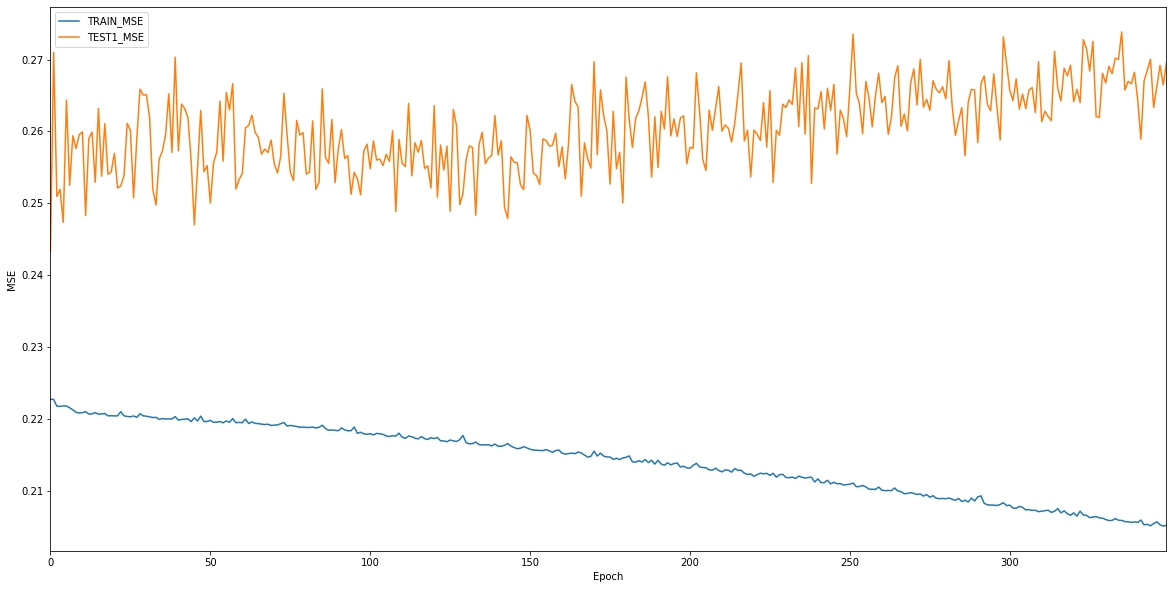

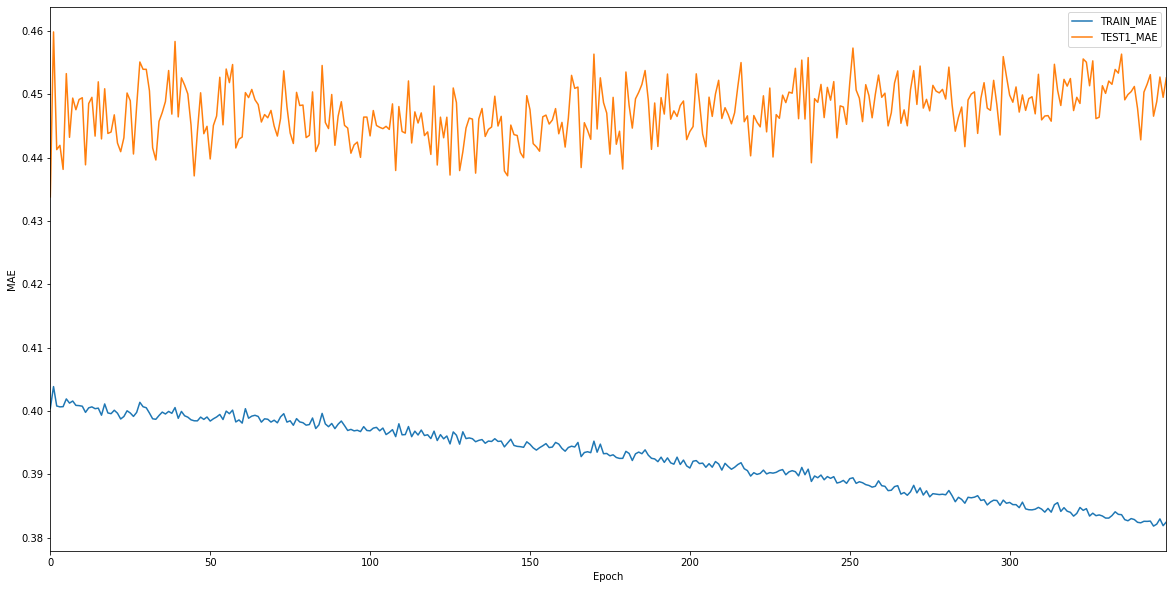

In [4]:
result = pd.read_csv("D:/Course content/Minor Project/models/hybrid_LSTM.csv")
columns = list(result)
ylabels = ["MSE", "MAE"]
i = 1
j = 0
while i < 6:
    result.plot(x=columns[0], y=[columns[i], columns[i+2]], kind="line", figsize=(20,10))
    plt.xlabel("Epoch")
    plt.ylabel(ylabels[j])
    plt.show()
    i += 3
    j += 1